In [224]:
import sys
print(sys.version)

3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)]


# 1. Install Dependencies and Setup

In [225]:
 !pip install tensorflow 


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Compu Srore\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [226]:
!pip install  opencv-python matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Compu Srore\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [227]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.2
attrs                        23.1.0
autopep8                     1.7.1
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       6.0.0
cachetools                   5.3.0
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           2.1.1
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.0.6
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
distlib                      0.3.6
e


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Compu Srore\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [228]:
import tensorflow as tf
import os

In [229]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [230]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [231]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [232]:
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [233]:
data_dir = 'data' 

In [234]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [235]:
img = cv2.imread(os.path.join('data', 'sad','e8edff50261b1df9182c77643556ab5a.jpg' ))

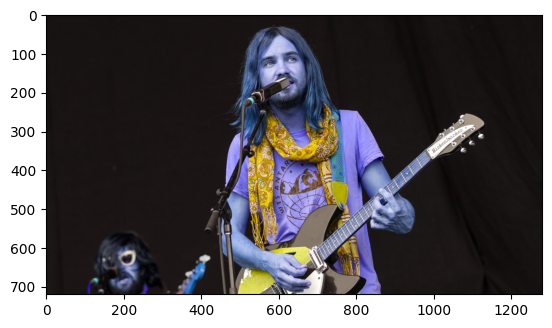

In [236]:
plt.imshow(img)

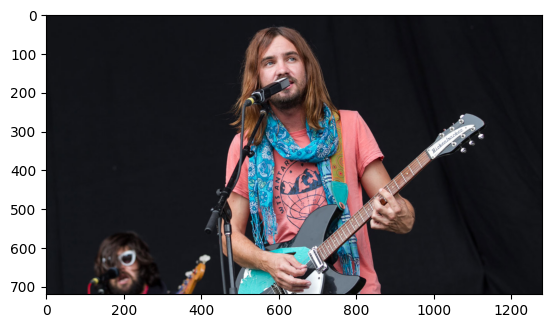

In [237]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [238]:
img.shape

(720, 1280, 3)

In [239]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\Cristiano\01-9.png
Image not in ext list data\Cristiano\Copy-of-WCup_World_Cup_Photo_Gallery_21279--475ef-1-1672671054245_18572f6c9c3_medium.jpg
Image not in ext list data\Cristiano\cristiano-ronaldo-al-nassr-gestures-803028591-1.jpg
Image not in ext list data\Cristiano\Cristiano-Ronaldo-ceremony-rename-airport-Santa-Cruz-Madeira-Portugal-March-29-2017.jpg
Image not in ext list data\Cristiano\skynews-cristiano-ronaldo-saudi-arabia_6142498.jpg
Image not in ext list data\Cristiano\skysports-cristiano-ronaldo_5823297.jpg
Image not in ext list data\Cristiano\skysports-cristiano-ronaldo_5823312.jpg
Image not in ext list data\Cristiano\skysports-cristiano-ronaldo_5926790.jpg
Image not in ext list data\Cristiano\Soccer-forward-Cristiano-Ronaldo-2018.jpg


In [240]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# 3. Load Data

In [241]:
import numpy as np
from matplotlib import pyplot as plt

In [242]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [243]:
##This will upload your data set, resize it and do some data preprocessing out of the box

In [244]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 179 files belonging to 2 classes.


In [245]:
##this will allow us to access the data as_numpy_iterator

In [246]:
data_iterator = data.as_numpy_iterator()

In [247]:
batch = data_iterator.next()

In [248]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [249]:
batch[1]

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [250]:
#Class 1 is Tame Impala 
#Class 2 is Lana 

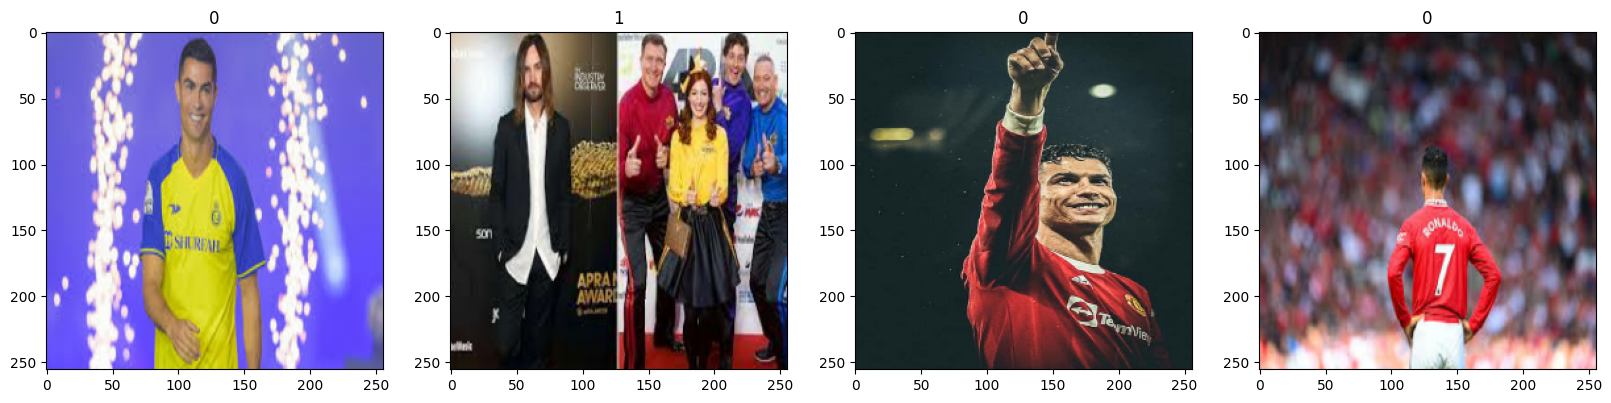

In [251]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [252]:
data = data.map(lambda x,y: (x/255, y))

In [253]:
nextbacth = data.as_numpy_iterator() 
nextt  = nextbacth.next()

In [254]:
nextt[0].max()

1.0

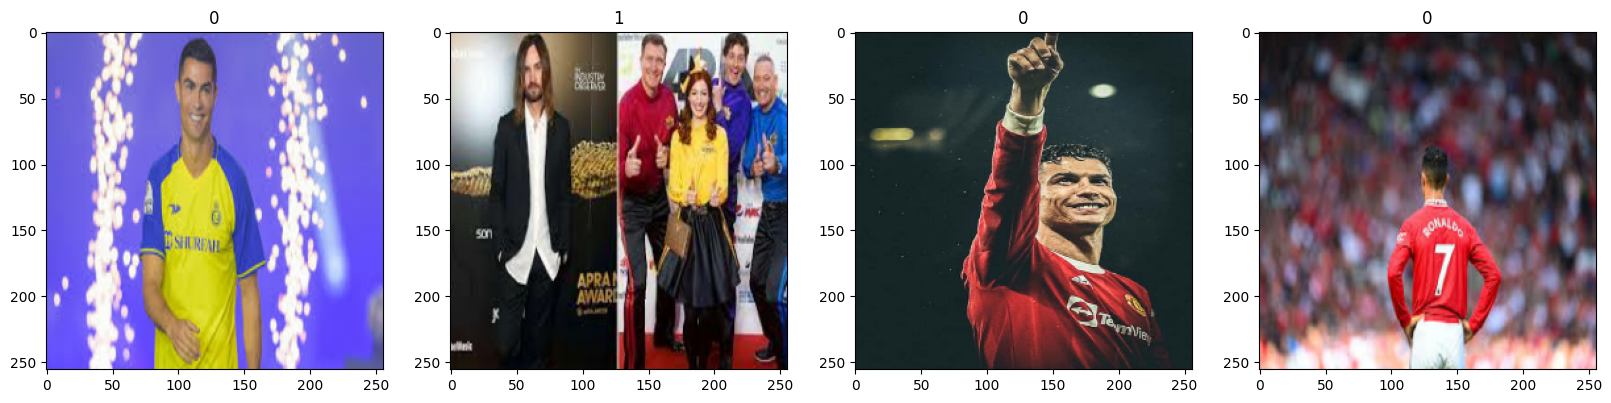

In [255]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [256]:
len(data) # 6 * 32 

6

In [257]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) + 1 

In [258]:
test_size + train_size + val_size

6

In [259]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [260]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [261]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [262]:
model = Sequential()

In [263]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) #16 filters |3*3 pixels | stride =1 moves by 1 pixel==> those are the architectural decisions
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [264]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [265]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 16)      

# 7. Train

In [266]:
logdir='logs'

In [267]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [268]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
4/4 [==============================] - 4s 645ms/step - loss: 0.7510 - accuracy: 0.5078 - val_loss: 0.6467 - val_accuracy: 0.8125
Epoch 2/30
4/4 [==============================] - 3s 591ms/step - loss: 0.6714 - accuracy: 0.5312 - val_loss: 0.6651 - val_accuracy: 0.5625
Epoch 3/30
4/4 [==============================] - 3s 595ms/step - loss: 0.6321 - accuracy: 0.6016 - val_loss: 0.7138 - val_accuracy: 0.4688
Epoch 4/30
4/4 [==============================] - 3s 580ms/step - loss: 0.6352 - accuracy: 0.6172 - val_loss: 0.5773 - val_accuracy: 0.7812
Epoch 5/30
4/4 [==============================] - 3s 579ms/step - loss: 0.6117 - accuracy: 0.6406 - val_loss: 0.6016 - val_accuracy: 0.7188
Epoch 6/30
4/4 [==============================] - 3s 598ms/step - loss: 0.5659 - accuracy: 0.7344 - val_loss: 0.5337 - val_accuracy: 0.7188
Epoch 7/30
4/4 [==============================] - 3s 579ms/step - loss: 0.5271 - accuracy: 0.7344 - val_loss: 0.5188 - val_accuracy: 0.7188
Epoch 8/30
4/4 [====

# 8. Plot Performance

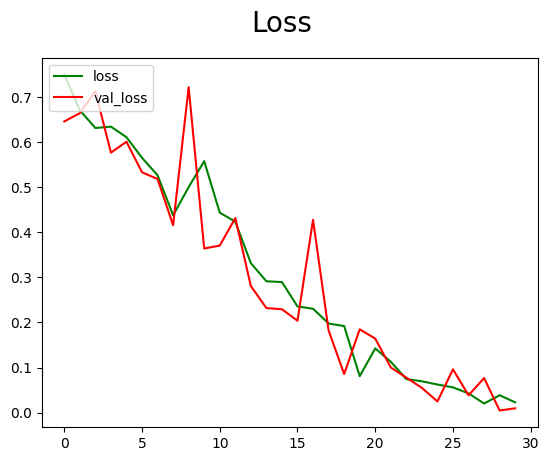

In [269]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='green', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

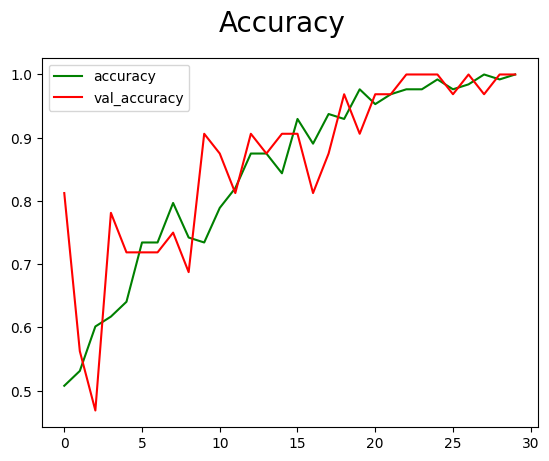

In [270]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [271]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [272]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [273]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 117ms/step


In [274]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 1.0 1.0


# 10. Test

In [275]:
import cv2

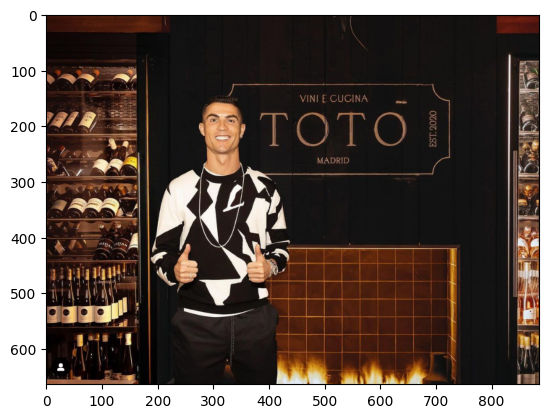

In [282]:
img = cv2.imread('cristianotest.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

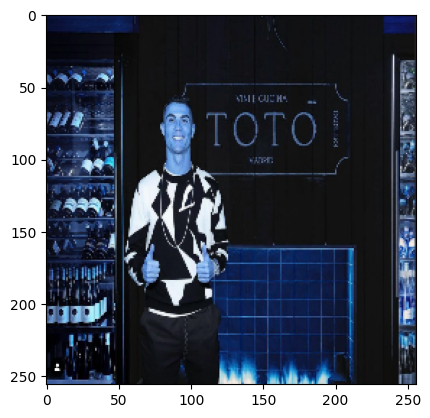

In [283]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [284]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 22ms/step


In [285]:
yhat

array([[0.6198904]], dtype=float32)

In [286]:
if yhat > 0.5: 
    print(f'Predicted class is Cristiano Ronaldo')
else:
    print(f'Predicted class is Tame impala')

Predicted class is Cristiano Ronaldo


# 11. Save the Model

In [287]:
from tensorflow.keras.models import load_model

In [288]:
model.save(os.path.join('models','Cristiano&TameImpalaModel.h5'))

In [290]:
new_model = load_model(os.path.join('models', 'Cristiano&TameImpalaModel.h5'))

In [292]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [293]:
if yhat_new > 0.5: 
    print(f'Predicted class is Cristiano Ronaldo')
else:
    print(f'Predicted class is Tame impala')

Predicted class is Cristiano Ronaldo


In [294]:
#The end